In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

### Load the dataset

In [2]:
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

#### Get the basic information
Lets check if the data have any null or na values

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine.shape

(1599, 12)

In [5]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Check for null values
print(red_wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [8]:
# Check for missing data  
print(red_wine.isin([np.nan]).sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Turn out the data dont have any null or n/a values. The dataset have 1599 rows and 12 columns and the data types is numberic

#### Let's do some statistic

In [9]:
red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


- The average value of `fixed acidity` is `8.31`, the highest value is `15.9` and the lowest value is `8.32`
- The average value of `volatile acidity` is `0.53`, the highest value is `1.58` and the lowest value is `0.12`
- The average value of `citric acid` is `0.27`, the highest value is `1` and the lowest value is `0`
- The average value of `residual sugar` is `2.54`, the highest value is `15.5` and the lowest value is `0.9`
- The average value of `chlorides` is `0.08`, the highest value is `0.61` and the lowest value is `0.01`
- The average value of `free sulfur dioxide` is `15.87`, the highest value is `72` and the lowest value is `1`
- The average value of `total sulfur dioxide` is `46.46`, the highest value is `289` and the lowest value is `6`
- The average value of `density` is `0.99`, the highest value is `1` and the lowest value is `0.99`
- The average value of `pH` is `3.31`, the highest value is `4.01` and the lowest value is `2.74`
- The average value of `sulphates` is `0.66`, the highest value is `2` and the lowest value is `0.33`
- The average value of `alcohol` is `10.42`, the highest value is `14.9` and the lowest value is `8.4`
- The average value of `quality` is `5.64`, the highest value is `8` and the lowest value is `3`

### Data Analysis

#### Distribution

Here is an analysis of the bar plots showing the relationship between different wine quality attributes and the target variable quality:

C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

<Axes: xlabel='quality', ylabel='pH'>

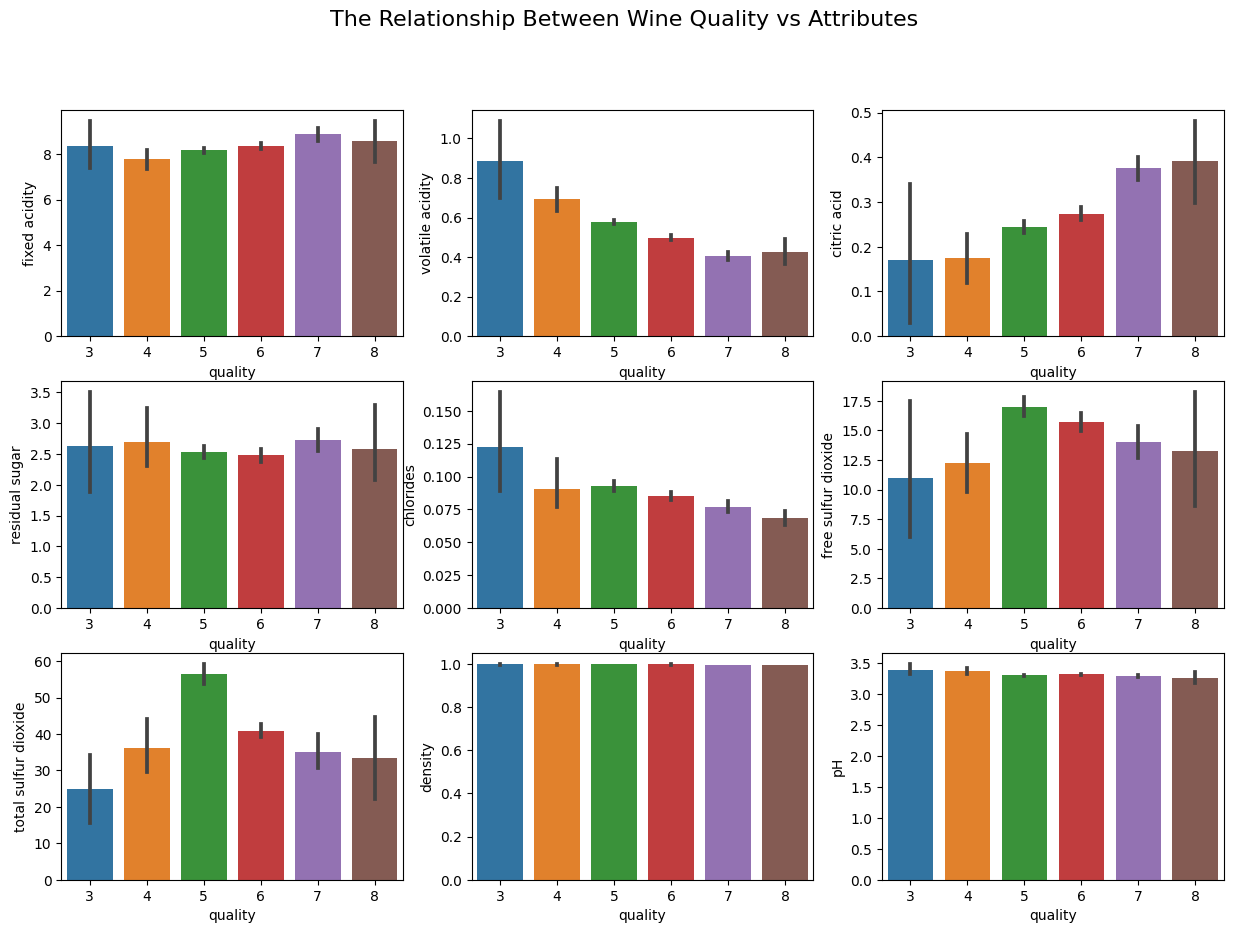

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharey=False)
plt.suptitle("The Relationship Between Wine Quality vs Attributes", fontsize=16)
axes = axes.flatten()

sns.barplot(ax = axes[0], x = 'quality', y = 'fixed acidity', data = red_wine)
sns.barplot(ax = axes[1], x = 'quality', y = 'volatile acidity', data = red_wine)
sns.barplot(ax = axes[2], x = 'quality', y = 'citric acid', data = red_wine)
sns.barplot(ax = axes[3], x = 'quality', y = 'residual sugar', data = red_wine)
sns.barplot(ax = axes[4], x = 'quality', y = 'chlorides', data = red_wine)
sns.barplot(ax = axes[5], x = 'quality', y = 'free sulfur dioxide', data = red_wine)
sns.barplot(ax = axes[6], x = 'quality', y = 'total sulfur dioxide', data = red_wine)
sns.barplot(ax = axes[7], x = 'quality', y = 'density', data = red_wine)
sns.barplot(ax = axes[8], x = 'quality', y = 'pH', data = red_wine)


- `Fixed Acidity` - No clear trend, acidity levels similar across quality ratings

- `Volatile Acidity` - Clear downward trend, higher quality wines have lower volatile acidity

- `Citric Acid` - No clear trend, some fluctuation but no correlation

- `Residual Sugar` - No clear trend, residual sugar fairly constant across qualities

- `Chlorides` - No clear trend, chlorides level unaffected by quality

- `Free Sulfur Dioxide` - Higher quality wines tend to have slightly higher free SO2

- `Total Sulfur Dioxide` - Higher quality wines tend to have noticeably higher total SO2

- `Density` - Slight upward trend, higher densities at higher qualities

- `pH` - No clear trend, pH level does not seem correlated with quality

C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

<Axes: xlabel='citric acid', ylabel='Count'>

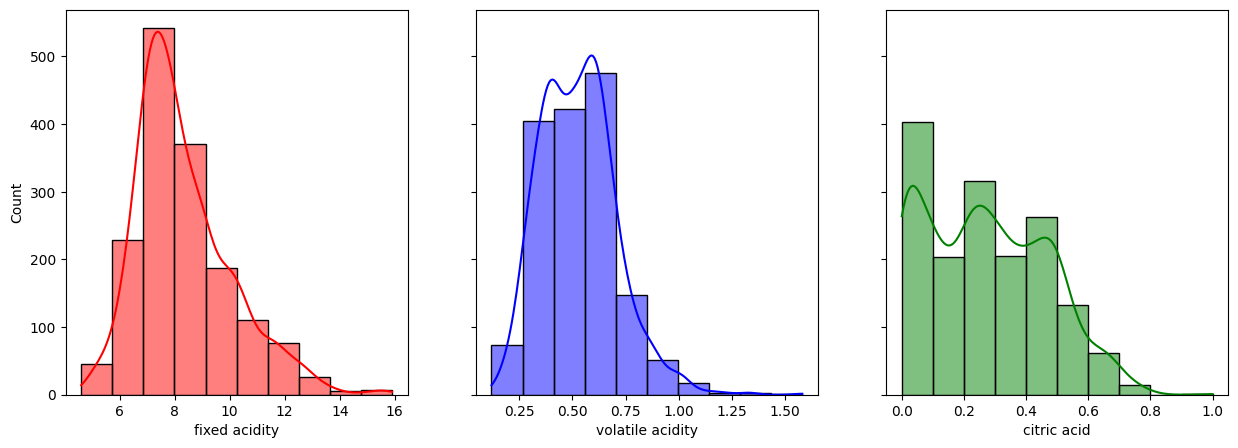

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.histplot(ax= axes[0], x = red_wine['fixed acidity'], 
                            kde=True, 
                            bins=10, 
                            color='red',
                            cbar=True)

sns.histplot(ax= axes[1], x = red_wine['volatile acidity'], 
                            kde=True, 
                            bins=10, 
                            color='blue',
                            cbar=True)
                            
sns.histplot(ax= axes[2], x = red_wine['citric acid'], 
                            kde=True, 
                            bins=10, 
                            color='green',
                            cbar=True)

`Fixed Acidity:`
- Unimodal distribution
- Approximately normal / Gaussian shape but slightly left skewed
- Peak frequency values clustered around 8-9
- Most wines have fixed acidity values in the range of 6-11

`Volatile Acidity:`
- Bimodal distribution with two peaks
- First peak around 0.2-0.4 (lower volatile acidity)
- Second peak around 0.6-0.8 (higher volatile acidity)
- Two clusterings indicate two common levels of volatile acidity

`Citric Acid:`
- Bimodal distribution
- First peak around 0.1-0.2 (lower citric acid)
- Second peak around 0.4-0.6 (higher citric acid)
- Two peaks indicates two common levels of citric acid content

C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

<Axes: xlabel='free sulfur dioxide', ylabel='Count'>

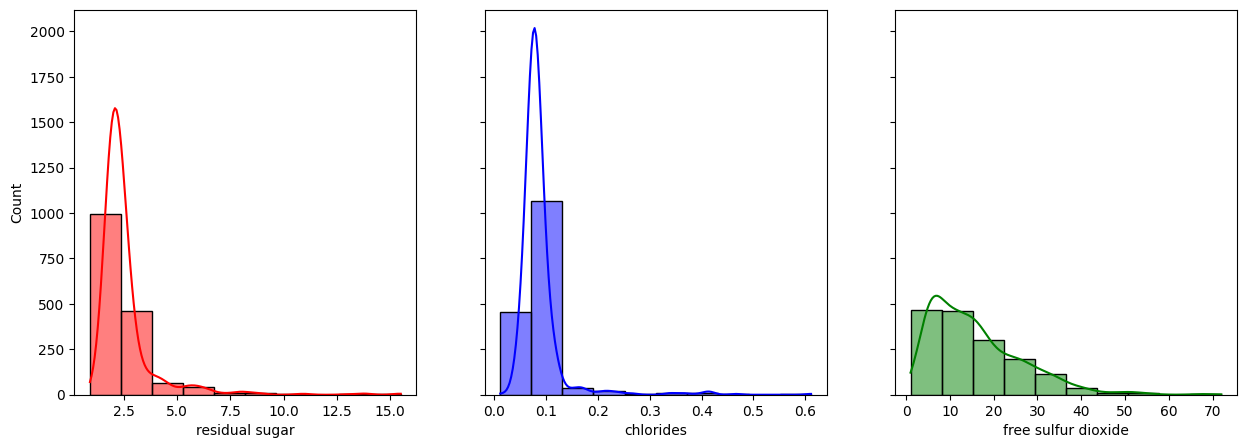

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.histplot(ax= axes[0], x = red_wine['residual sugar'], 
                            kde=True, 
                            bins=10, 
                            color='red',
                            cbar=True)

sns.histplot(ax= axes[1], x = red_wine['chlorides'], 
                            kde=True, 
                            bins=10, 
                            color='blue',
                            cbar=True)
                            
sns.histplot(ax= axes[2], x = red_wine['free sulfur dioxide'], 
                            kde=True, 
                            bins=10, 
                            color='green',
                            cbar=True)


`Residual Sugar:`
- Unimodal distribution, skewed right with a long tail
- Most values clustered on left side between 0-10, with decreasing frequency towards the right
- Indicates most wines have low-moderate residual sugar content

`Chlorides:`
- Unimodal distribution, approximately normal / Gaussian shape
- Peak frequency values centered around 0.05-0.1
- Symmetric bell curve indicates most values clustered around the mean

`Free Sulfur Dioxide:`
- Bimodal distribution with two peaks
- First peak between 0-50 (lower sulfur dioxide)
- Second peak around 125-150 (higher sulfur dioxide)
- Bimodality indicates two common levels of sulfur dioxide content

C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

<Axes: xlabel='pH', ylabel='Count'>

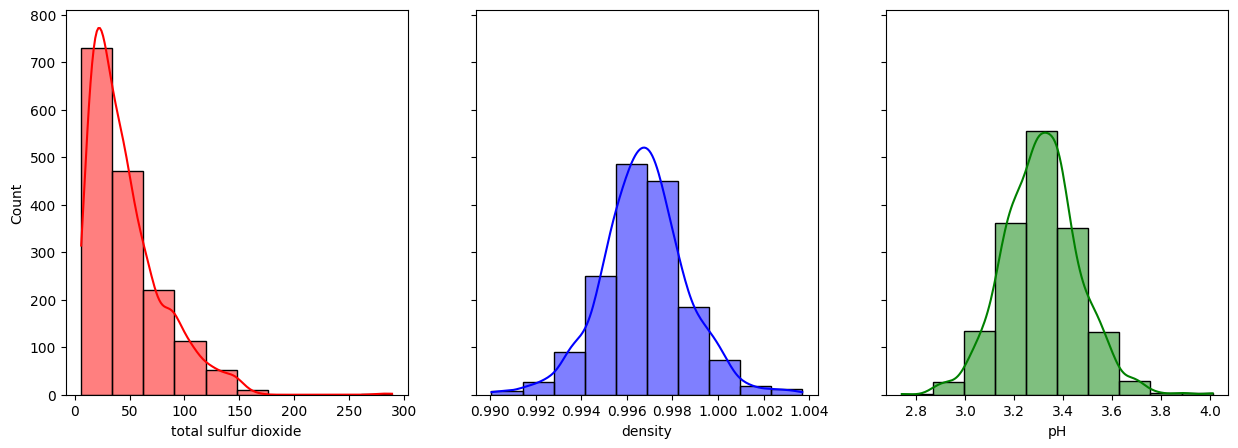

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.histplot(ax= axes[0], x = red_wine['total sulfur dioxide'], 
                            kde=True, 
                            bins=10, 
                            color='red',
                            cbar=True)

sns.histplot(ax= axes[1], x = red_wine['density'], 
                            kde=True, 
                            bins=10, 
                            color='blue',
                            cbar=True)
                            
sns.histplot(ax= axes[2], x = red_wine['pH'], 
                            kde=True, 
                            bins=10, 
                            color='green',
                            cbar=True)

`Total Sulfur Dioxide:`
- Unimodal, right-skewed distribution
- Most values clustered between 50-200 ppm
- Long tail indicates some wines have much higher total SO2

`Density:`
- Unimodal, approximately normal distribution
- Symmetric bell curve shape clustered around 0.99-1.0 g/cm^3
- Indicates most wines have similar density values

`pH:`
- Unimodal distribution, slightly left-skewed
- Most values centered around 3.2-3.4
- Wider spread indicates broader range of pH values

C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

<Axes: xlabel='quality', ylabel='Count'>

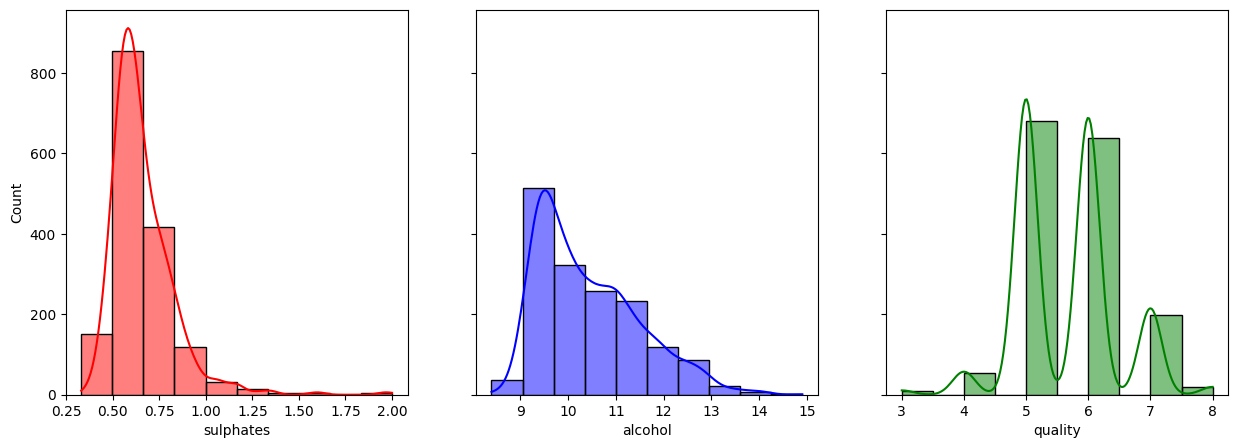

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.histplot(ax= axes[0], x = red_wine['sulphates'], 
                            kde=True, 
                            bins=10, 
                            color='red',
                            cbar=True)

sns.histplot(ax= axes[1], x = red_wine['alcohol'], 
                            kde=True, 
                            bins=10, 
                            color='blue',
                            cbar=True)
                            
sns.histplot(ax= axes[2], x = red_wine['quality'], 
                            kde=True, 
                            bins=10, 
                            color='green',
                            cbar=True)

`Sulphates:`
- Unimodal, right-skewed distribution
- Most values clustered between 0.5-1.5 g/L
- Long tail indicates some wines have much higher sulphate content

`Alcohol:`
- Unimodal, approximately normal distribution
- Symmetric bell curve centered around 10-11% ABV
- Indicates most wines have similar alcohol content

`Quality:`
- Unimodal, slightly left-skewed
- Most values clustered around 5-6 rating
- Left skew indicates more wines with ratings at the lower end

#### Colleration

C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

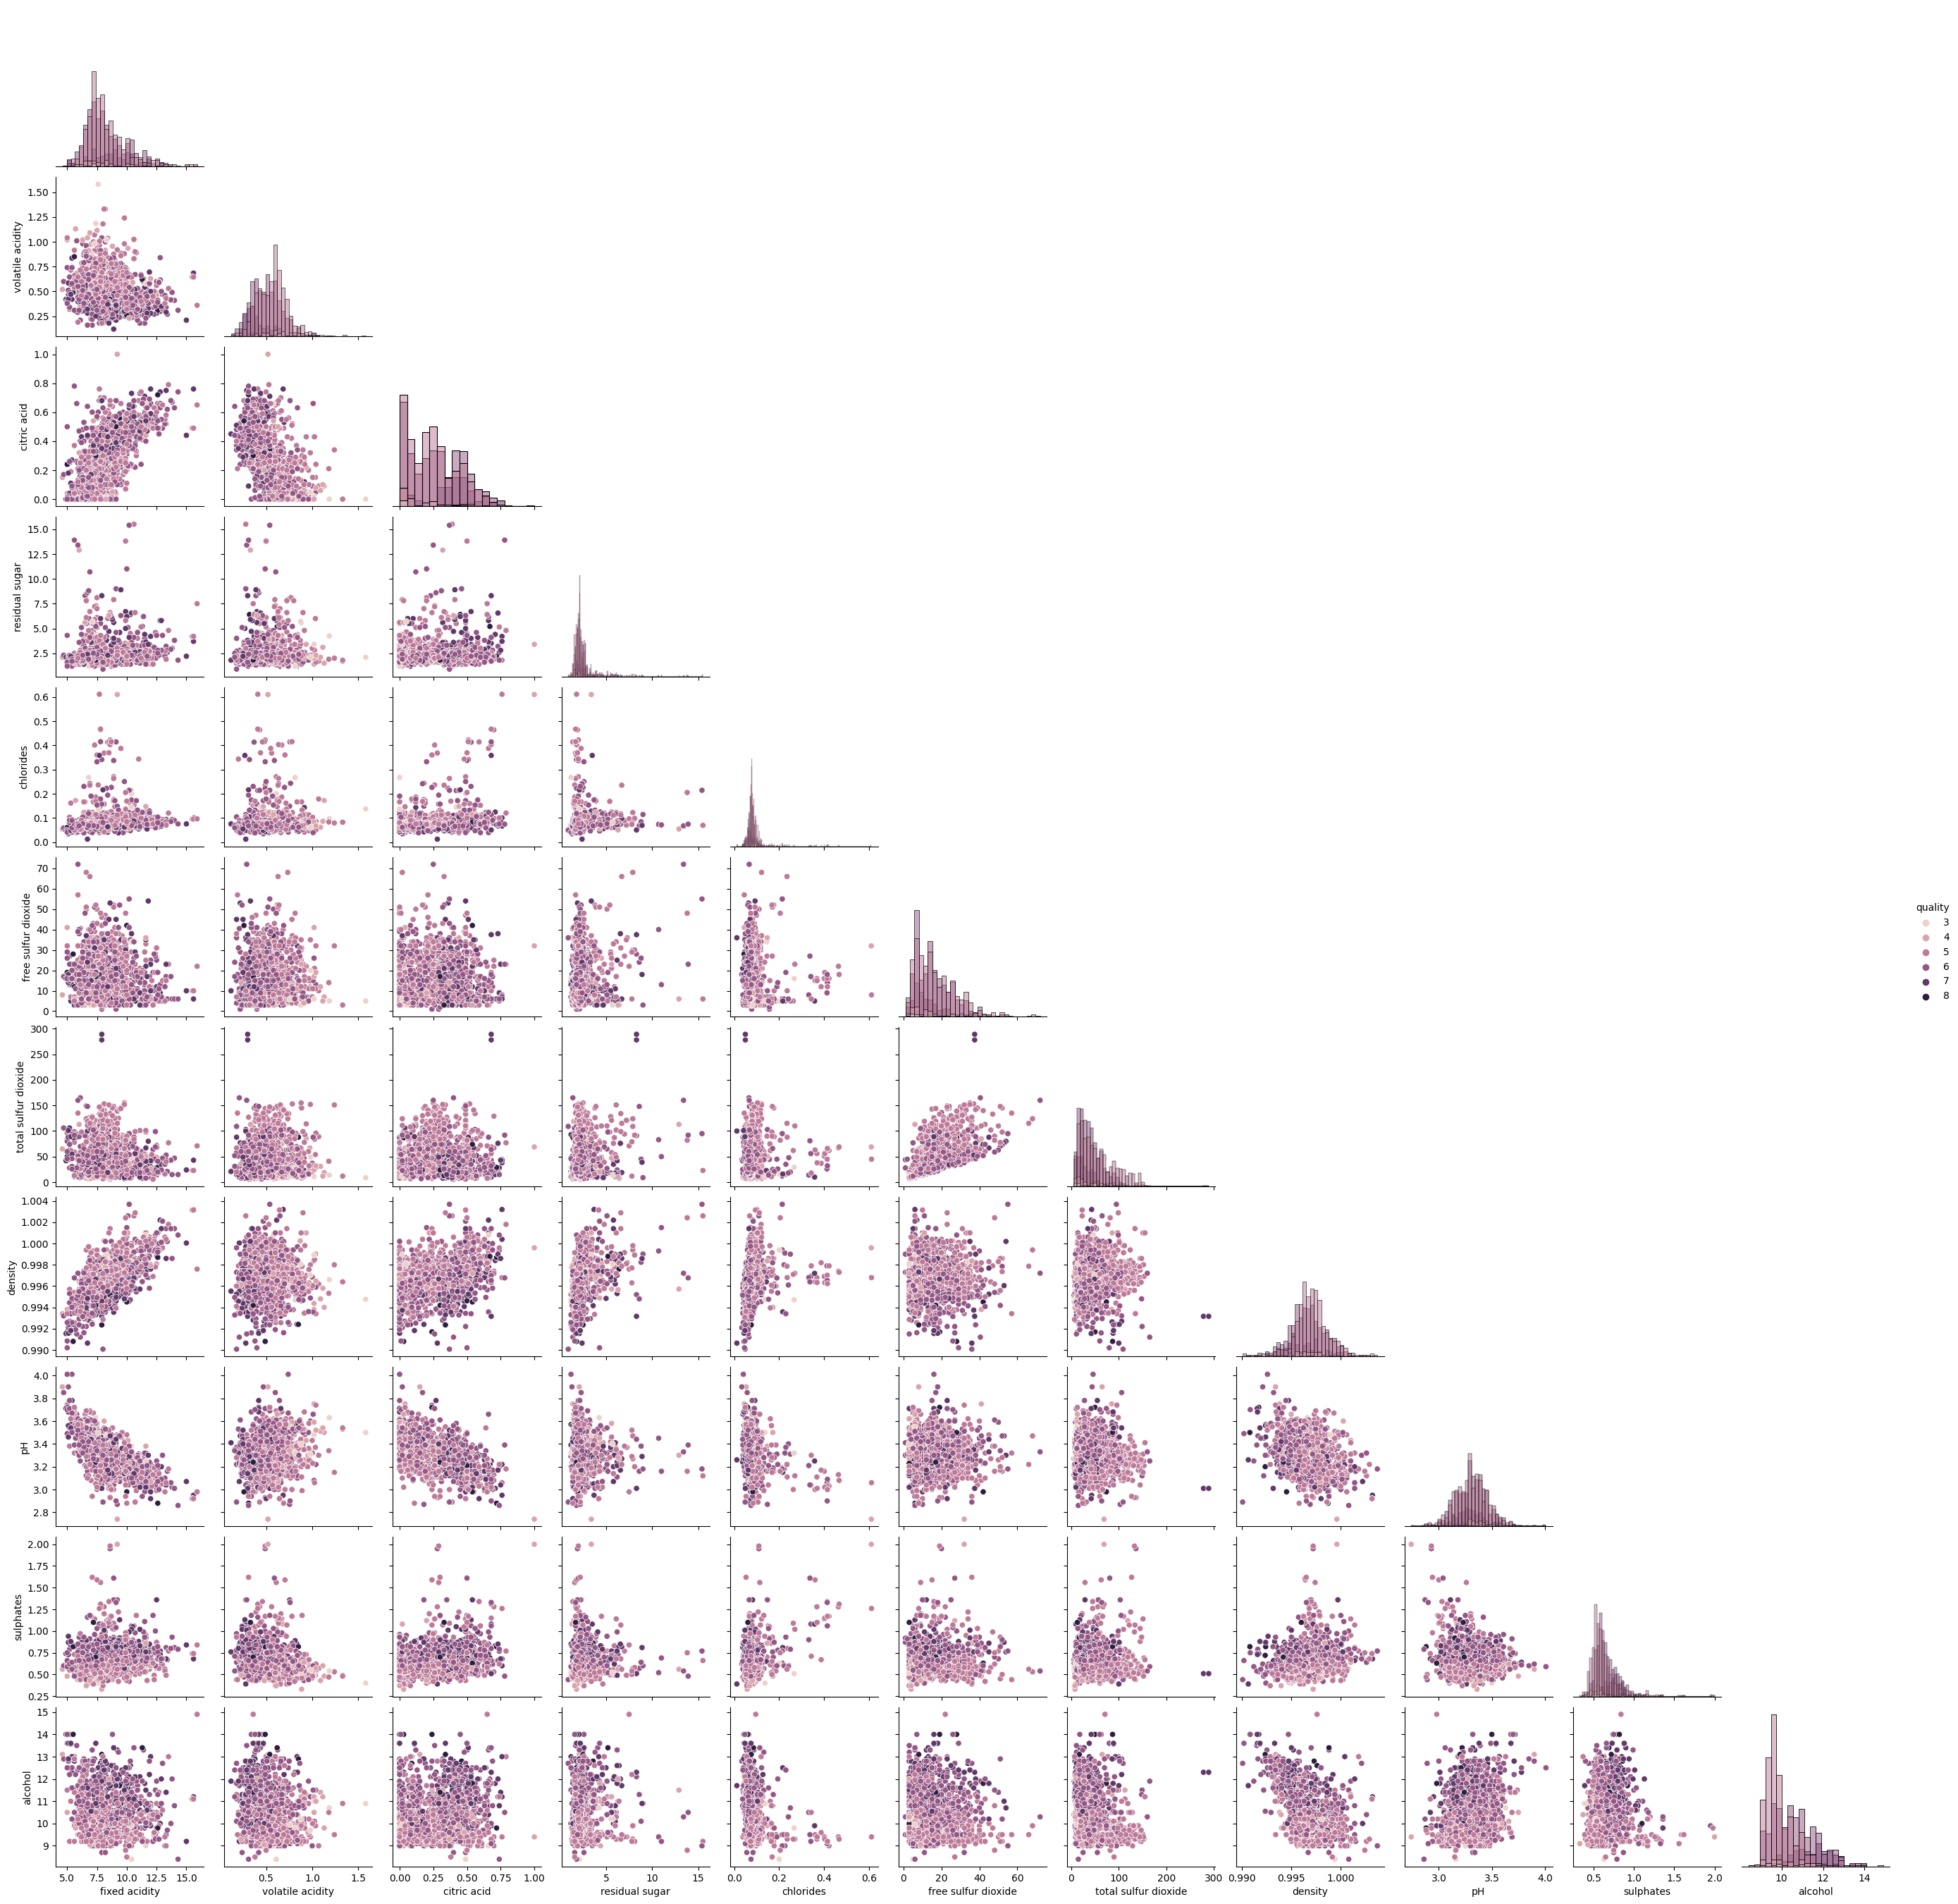

In [15]:
sns.pairplot(data= red_wine, diag_kind = "hist", hue= "quality", corner=True)

We notice that there is `correlation between some variables` and this is called `multicollinearity`



C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thien\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

Text(0.5, 1.0, 'The Correlations Between Chlorides vs Free Sulfur Dioxide')

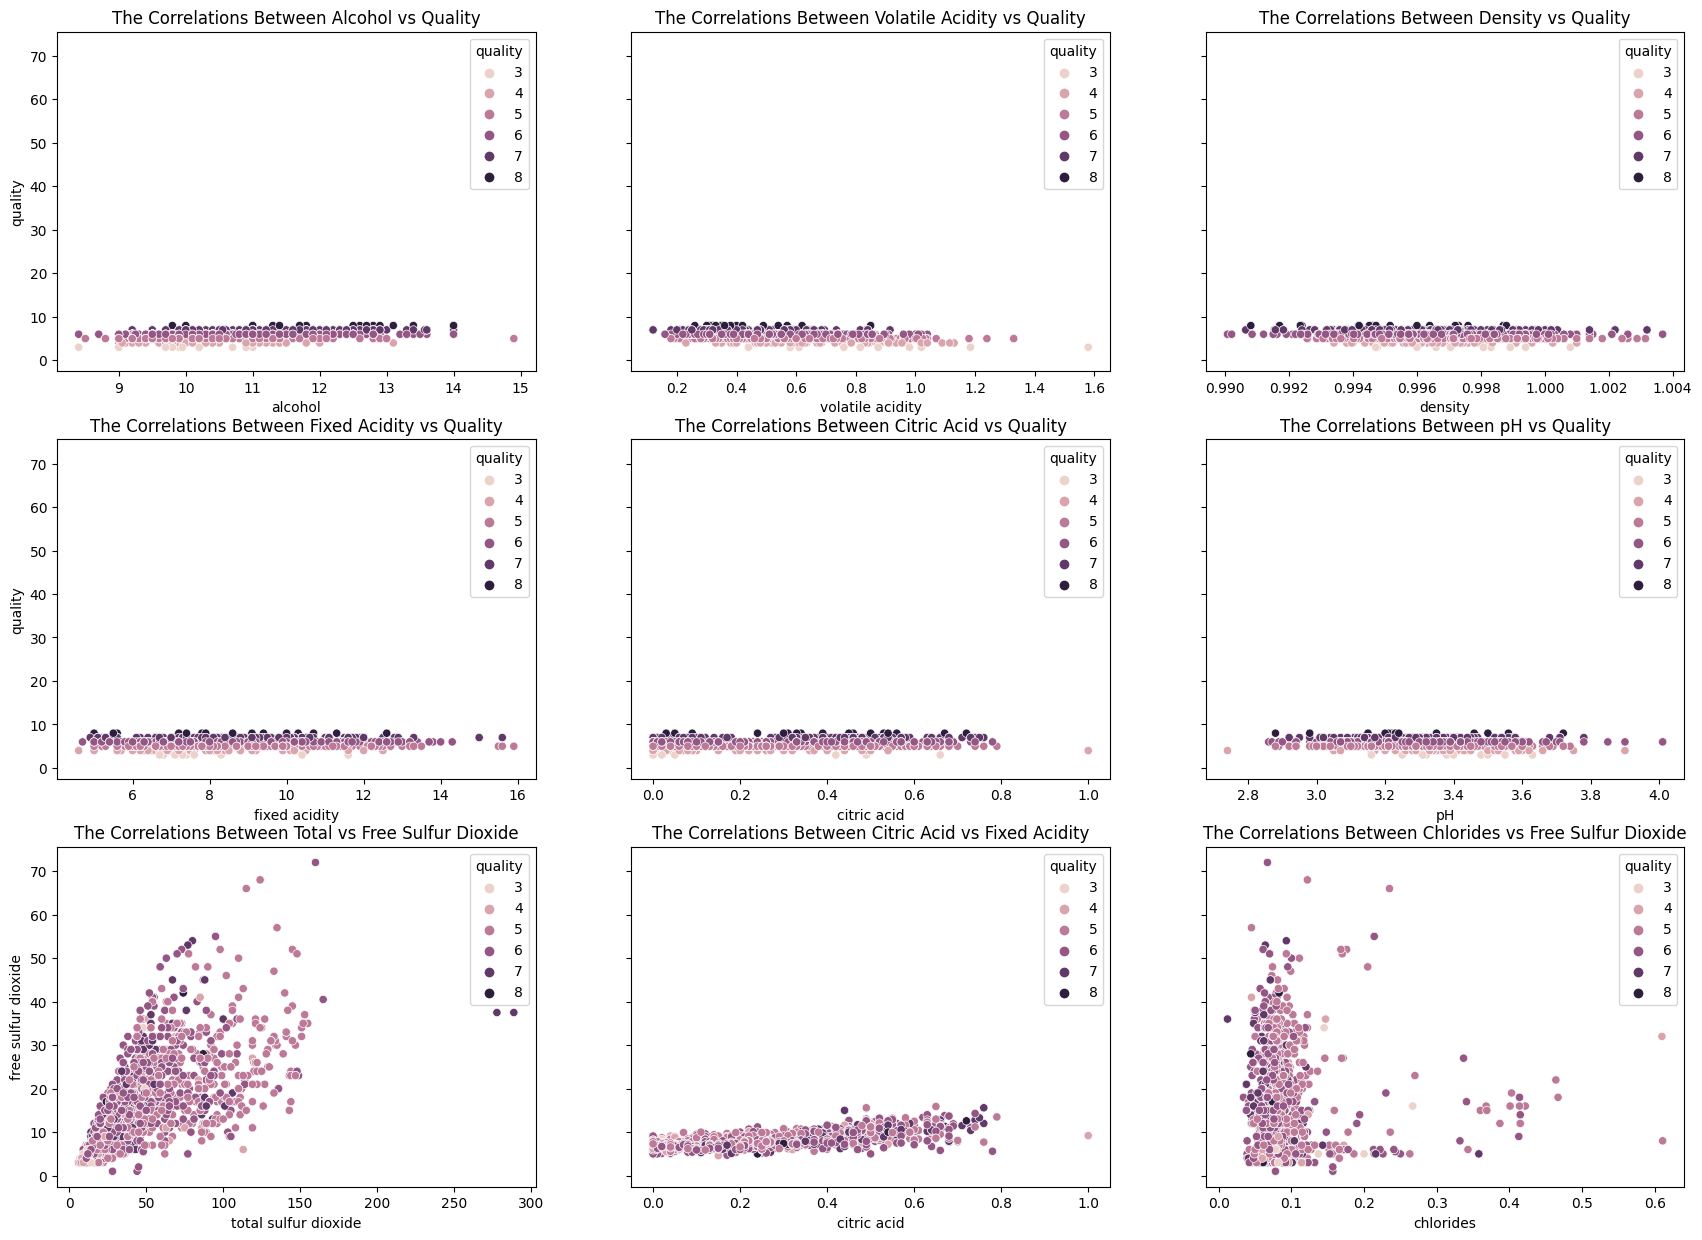

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(21, 15), sharey=True)
axes = axes.flatten()

sns.scatterplot(ax = axes[0], x='alcohol', y='quality', hue= 'quality', data = red_wine).set_title('The Correlations Between Alcohol vs Quality')

sns.scatterplot(ax = axes[1], x='volatile acidity', y='quality', hue= 'quality', data = red_wine).set_title('The Correlations Between Volatile Acidity vs Quality')

sns.scatterplot(ax = axes[2], x='density', y='quality', hue= 'quality', data = red_wine).set_title('The Correlations Between Density vs Quality')

sns.scatterplot(ax = axes[3], x='fixed acidity', y='quality', hue= 'quality', data = red_wine).set_title('The Correlations Between Fixed Acidity vs Quality')

sns.scatterplot(ax = axes[4], x='citric acid', y='quality', hue= 'quality', data = red_wine).set_title('The Correlations Between Citric Acid vs Quality')

sns.scatterplot(ax = axes[5], x='pH', y='quality', hue= 'quality', data = red_wine).set_title('The Correlations Between pH vs Quality')
 
sns.scatterplot(ax = axes[6], x='total sulfur dioxide', y='free sulfur dioxide', hue= 'quality', data = red_wine).set_title('The Correlations Between Total vs Free Sulfur Dioxide')

sns.scatterplot(ax = axes[7], x='citric acid', y='fixed acidity', hue= 'quality', data = red_wine).set_title('The Correlations Between Citric Acid vs Fixed Acidity')

sns.scatterplot(ax = axes[8], x='chlorides', y='free sulfur dioxide', hue= 'quality', data = red_wine).set_title('The Correlations Between Chlorides vs Free Sulfur Dioxide')

- `Strong positive` correlation between `alcohol` and `quality` - `higher alcohol` is associated with `higher quality ratings`.
- `Strong negative` correlation between `volatile acidity` and `quality` - `higher volatile` acidity is associated with `lower quality`.
- `Moderate positive` correlation between `density` and `quality` - `higher density` is `weakly` associated with `higher quality`.
- `Weak` correlation between `fixed acidity`, `citric acid`, `pH`, etc and `quality` - these attributes are not strongly related to `quality ratings`.
- `Strong positive` correlation between `total` and `free sulfur dioxide` - these two measures are highly correlated as expected.
- `Moderate negative` correlation between `chlorides` and `free SO2` - wines with `more chlorides` tend to have `less free SO2`.
- `Residual sugar` and `density` show `weak negative` correlation - wines with more `residual sugar` tend to be `slightly less dense`.

<Axes: >

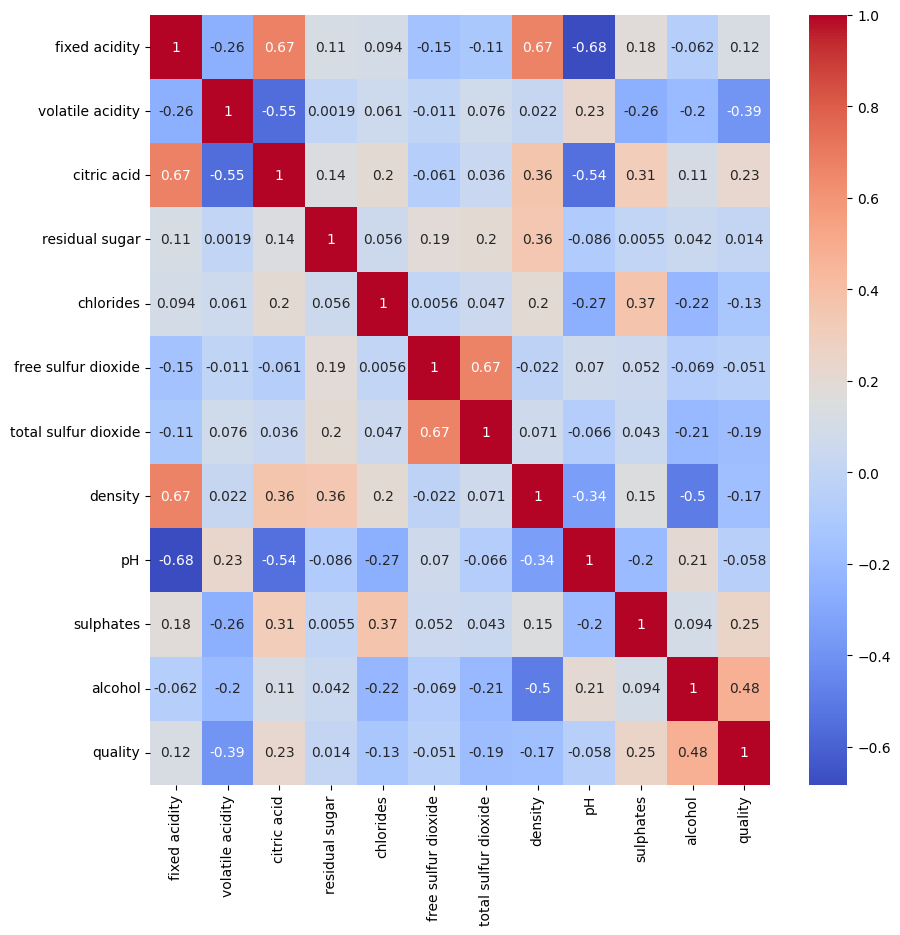

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(red_wine.corr(), annot=True, cmap='coolwarm')

- The heatmap shows the correlation coefficient between each pair of variables in the dataset.
- Red indicates a positive correlation, while blue indicates a negative correlation. Color intensity and the numbers show the correlation strength.
- The strongest positive correlation is between total sulfur dioxide and free sulfur dioxide (0.67) - as expected since they are related measures.
- Alcohol is positively correlated with quality (0.43), indicating wines with higher alcohol tend to rate higher quality.
- Volatile acidity has a strong negative correlation with quality (-0.39). Higher acidity is associated with lower ratings.
- Density shows a moderate positive correlation with quality (0.17). Denser wines tend to be higher quality.
- Fixed acidity, citric acid, chlorides, pH and sulphates have relatively weak correlations close to 0.
- The map visually summarizes the major positive and negative correlations related to wine quality based on the color intensity.

#### Splitting the Red Wine Data into Training and Test Sets
This code is splitting the red wine dataset into X (features) and y (target) arrays, then further splitting them into training and testing sets for modeling.

In [18]:
red_wine_subset = red_wine[['alcohol', 'volatile acidity', 'density', 'quality']]

First, a subset of the red wine data is created keeping only the `alcohol`, `volatile acidity`, `density`, and `quality` columns. These were identified earlier as being important predictive attributes.

The `quality` column is separated into a target variable y. The remaining columns `alcohol`, `volatile acidity`, `density` are assigned to the feature matrix X

In [19]:
X = red_wine_subset.drop('quality', axis=1) 
y = red_wine_subset['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1119, 3) (1119,)
(480, 3) (480,)


Next, `scikit-learn's train_test_split()` function is used to split the feature and target arrays into randomized train and test sets with a test size of 30%. A fixed random state ensures consistent splits.

The training and testing feature/target shapes are printed, confirming a `70%/30%` split of the data.

###  Model Construction
#### Training an SGDRegressor
This code fits a SGDRegressor model on the red wine training data and evaluates its performance on the training and test sets.

In [20]:
sgd = SGDRegressor(learning_rate='constant', max_iter=1000, penalty='l2') 

sgd.fit(X_train, y_train)

SGDRegressor(learning_rate='constant')

First, a SGDRegressor is instantiated with hyperparameters like learning rate, maximum iterations, and L2 regularization penalty.

The model is fit on the training feature/target arrays X_train and y_train.

In [21]:
y_pred_train = sgd.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False) 
r2_train = r2_score(y_train, y_pred_train)
print("SGD Training Set RMSE: ", rmse_train) 
print("R-squared: ", r2_train)

SGD Training Set RMSE:  0.8306338686364612
R-squared:  -0.04742616793281784


Predictions are made on X_train and compared to y_train to evaluate training set performance. RMSE and R-squared metrics are calculated.

- The training RMSE of 1.936 indicates the model's predictions on average miss the true training targets by around 1.936 quality rating points. This is quite high considering the target quality scores range from 0 to 10.

- The negative R-squared value of -4.69 indicates the model performs worse than simply predicting the mean target value on the training data. An R-squared of 0 means the model does no better than the mean, while negative values indicate worse performance.

In [22]:
y_pred_test = sgd.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("SGD Regressor Test Set RMSE: ", rmse_test)

SGD Regressor Test Set RMSE:  0.8266273926188629


Here is an analysis of the SGDRegressor test set performance:

The model achieves `a test RMSE of 1.953` on the unseen test set data.

This is very close to `the training RMSE of 1.936`, indicating `minimal overfitting`. The model has not memorized the training data.

However, `the test error is still quite high` in absolute terms. Predicting the test quality ratings within 2 points (out of 10 total) on average is not very precise.

The model fails to generalize well to new data, performing similarly poorly on the test set.

#### Fitting an OLS Regression Model
This code fits an Ordinary Least Squares (OLS) linear regression model on the red wine data using Statsmodels.

In [23]:
X = red_wine_subset[['alcohol', 'volatile acidity', 'density']] 
y = red_wine_subset['quality']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     248.9
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          1.82e-132
Time:                        13:12:48   Log-Likelihood:                -1619.6
No. Observations:                1599   AIC:                             3247.
Df Residuals:                    1595   BIC:                             3269.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -18.4065     10.298  

- The R-squared of 0.319 indicates the model explains 31.9% of the variance in wine quality. This is a moderate fit, so there is room for improvement in the model
- The F-statistic of 248.9 and tiny p-value indicates the overall model fit is statistically significant. The predictors reliably estimate wine quality.
- Alcohol has a positive coefficient of 0.33, indicating higher alcohol content is associated with higher quality ratings. This relationship is highly significant based on the large t-value and minuscule p-value.
- Volatile acidity has a negative coefficient of -1.37, indicating higher acidity is associated with lower quality. Also highly statistically significant.
- Density has a positive coefficient of 21.36, suggesting higher density wines tend to rate higher quality. The t-value is small and p-value indicates this is a weaker, borderline significant relationship.
- Density has a positive coefficient of 21.36, suggesting higher density wines tend to rate higher quality. The t-value is small and p-value indicates this is a weaker, borderline significant relationship.
- The condition number is very high, indicating potential multicollinearity issues. This suggests high correlations between some predictors.